In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Figure size 640x480 with 0 Axes>

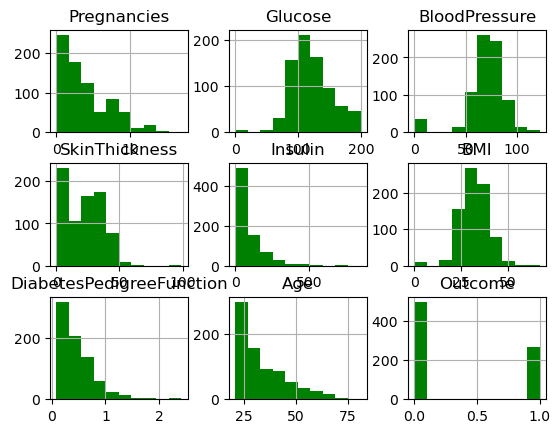

In [5]:
plt.tight_layout()
df.hist(color="green") 
plt.show()



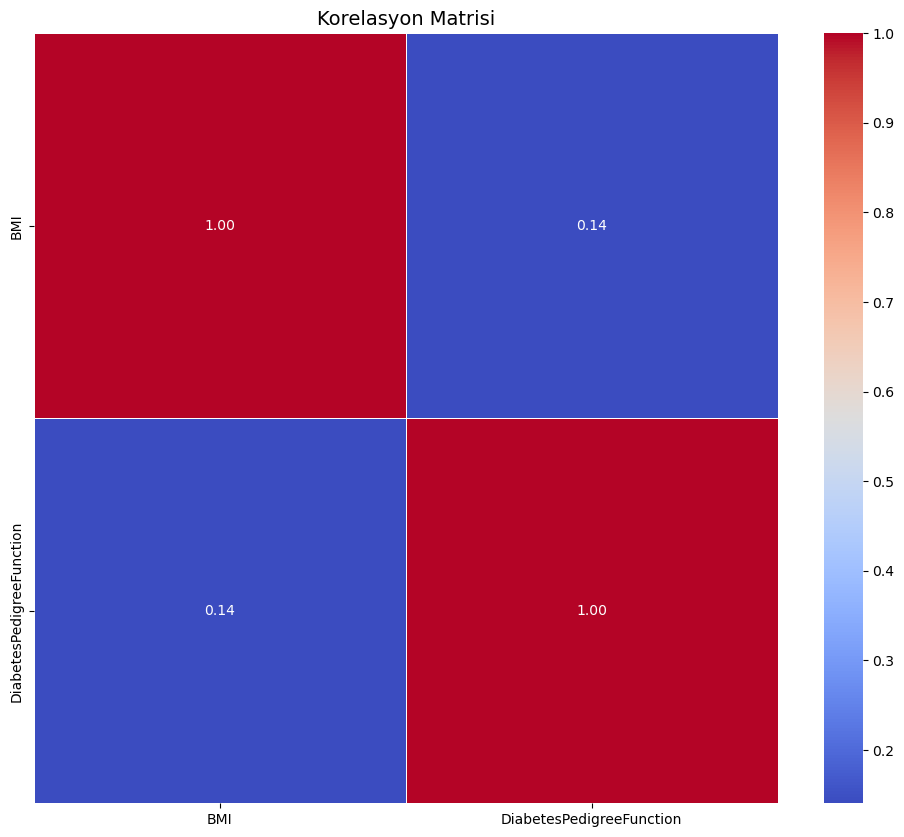

In [6]:
numerical_df = df.select_dtypes(include=["float64"])

# Korelasyon matrisi hesaplanır. corr() ile.
correlation_matrix = numerical_df.corr()

# Korelasyon matris ısı haritası çizilir yani görselleştirilir.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi", fontsize=14)
plt.show()



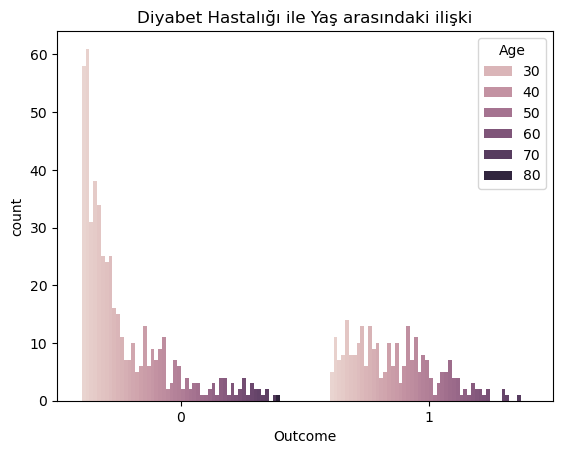

In [7]:
#Hedef değişken ile bağımsız değişkenlerin arasındaki görsel ilişkiler
sns.countplot(data=df , x='Outcome' , hue= 'Age')
plt.title("Diyabet Hastalığı ile Yaş arasındaki ilişki")
plt.show()   



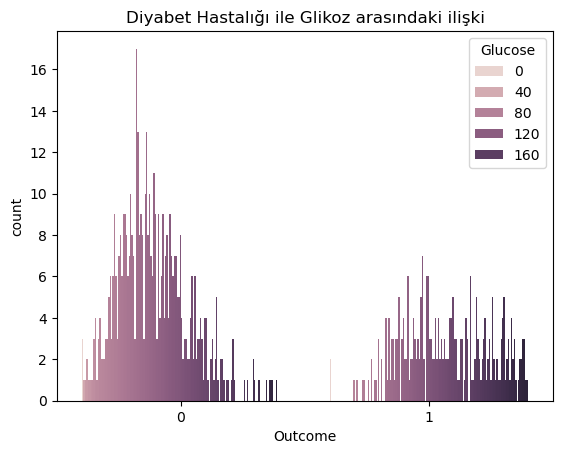

In [8]:
sns.countplot(data=df , x='Outcome' , hue= 'Glucose')
plt.title("Diyabet Hastalığı ile Glikoz arasındaki ilişki")
plt.show()   


In [9]:
from sklearn.preprocessing import StandardScaler


numerical_columns = df.select_dtypes(include=["float64"]).columns  

scaler=StandardScaler()                                                    
df [numerical_columns] = scaler.fit_transform(df[numerical_columns])       
                                                                           
#Standartlaştırılmış verilerin her sütun için ilk beş satırı kontrol edilir.
print(df[numerical_columns].head())                              



        BMI  DiabetesPedigreeFunction
0  0.204013                  0.468492
1 -0.684422                 -0.365061
2 -1.103255                  0.604397
3 -0.494043                 -0.920763
4  1.409746                  5.484909


In [10]:
y=df["Outcome"]                        
X = df.drop("Outcome",axis=1)            

In [11]:
from sklearn.model_selection import train_test_split                                   
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)  

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(max_depth=4, random_state=42)

In [35]:
print(X_train.dtypes)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


In [36]:
dtree.fit(X_train,y_train) #Model eğitildi ve başladı.

DecisionTreeClassifier(max_depth=4, random_state=42)

In [37]:
y_predict = dtree.predict(X_test)

Accuracy: 0.6948051948051948
Precision: 0.5588235294117647
Recall: 0.6909090909090909
F1 Score: 0.6178861788617886

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.70      0.75        99
           1       0.56      0.69      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.72      0.69      0.70       154



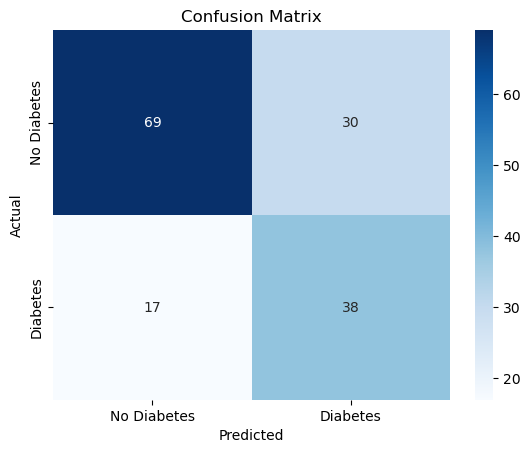

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Test verisi ile tahmin
y_pred = dtree.predict(X_test)

# Doğruluk (Accuracy)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Kesinlik (Precision)
print("Precision:", precision_score(y_test, y_pred))

# Geri çağırma (Recall)
print("Recall:", recall_score(y_test, y_pred))

# F1 Skoru
print("F1 Score:", f1_score(y_test, y_pred))

# Sınıflandırma raporu
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix görselleştirme
labels = ['No Diabetes', 'Diabetes']

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtree, out_file=None,
                           feature_names=X.columns,
                           class_names=["Diyabet Yok", "Diyabet Var"],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("karar_agaci", format="png", cleanup=False)  # PNG dosyası olarak kaydet
graph  # Görseli not defterinde göster


plt.figure(figsize=(30, 15))  # Daha büyük bir görsel için
plot_tree(dtree, feature_names=X.columns, class_names=["Diyabet Yok", "Diyabet Var"], filled=True)
plt.show()